In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df_original = pd.read_csv("nba.csv")

In [11]:
df_original.shape

(50, 14)

In [12]:
df_original.head()

,rank,player,position,teams,total_points,total_games,points_per_game,field_goals,three_points_goals,free_shots,born,active_player,hall_of_fame,country
0,1,Kareem Abdul-Jabbar,C,Milwaukee Bucks (1969–1975)\nLos Angeles Laker...,38387,1560,24.6,15837,1,6712,1947,0,1995.0,USA
1,2,LeBron James,SF,"Cleveland Cavaliers (2003–2010, 2014–2018)\nMi...",37655,1388,27.1,13777,2189,7912,1984,1,NaN,USA
2,3,Karl Malone,PF,Utah Jazz (1985–2003)\nLos Angeles Lakers (200...,36928,1476,25.0,13528,85,9787,1963,0,2010.0,USA
3,4,Kobe Bryant,SG,Los Angeles Lakers (1996–2016),33643,1346,25.0,11719,1827,8378,1978-2020,0,2020.0,USA
4,5,Michael Jordan,SG,"Chicago Bulls (1984–1993, 1995–1998)\nWashingt...",32292,1072,30.1,12192,581,7327,1963,0,2009.0,USA


## Analysis/Visualizations
1. [Breakdown of Retired/Active Players](#1.-Breakdown-of-Active/Retired-Players)
2. [Representation of Countries within Top 50](#2.-Representation-of-Countries-within-Top-50)
3. [Teams with the Most Players in Top 50](#3.-Teams-with-Most-Top-50-Players)
4. [Most/Least Common Positions in Top 50](#4.-Most/Least-Common-Player-Positions-in-Top-50)
5. [Most/Least Loyal Players (by number of teams played for)](#5.-Most/Least-Loyal-Players)

## Data Preprocessing
Some of the steps taken:
- Creating copies of original dataframe
- Exploding columns such as "teams" made up of multiple teams split by "\n"
- Adding columns such as "teams_played_for" by counting number of teams split by "\n" in "teams"

In [13]:
df_loyalty = df_original.copy()
df_loyalty = df_loyalty[["player", "rank", "position", "teams", "total_points"]]
df_loyalty["teams_played_for"] = df_loyalty["teams"].apply(lambda x: len(x.split("\n")))

In [14]:
df_split_teams = df_original.copy()
df_split_teams["teams_played_for"] = df_split_teams["teams"].apply(lambda x: len(x.split("\n")))
df_split_teams["teams"] = df_split_teams["teams"].apply(lambda x: x.split("\n"))
df_split_teams = df_split_teams.explode("teams").reset_index(drop = True)
df_split_teams["years_in_team"] = df_split_teams["teams"].apply(lambda x: x.split()[-1])
df_split_teams["teams"] = df_split_teams["teams"].apply(lambda x: x.split(" (")[0])
df_split_teams["years_in_team"] = df_split_teams["years_in_team"].str.replace("[()]", "")
df_split_teams = df_split_teams[["rank", "player", "position", "teams", "total_points", "years_in_team", "teams_played_for"]]
df_split_teams = df_split_teams.reset_index(drop = True)

/var/folders/ft/z68_bqfj30v184wxtmdm00100000gn/T/ipykernel_1520/2904900394.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_split_teams["years_in_team"] = df_split_teams["years_in_team"].str.replace("[()]", "")


In [15]:
df_split_positions = df_original.copy()
df_split_positions["position"] = df_split_positions["position"].apply(lambda x: x.split("/"))
df_split_positions = df_split_positions.explode("position")
df_split_positions = df_split_positions[["player", "rank", "position", "teams", "total_points"]]

## 1. Breakdown of Active/Retired Players

0    41
1     9
Name: active_player, dtype: int64

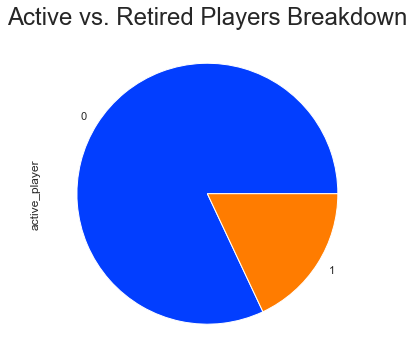

In [16]:
df_active = df_original.copy()

sns.set(rc = {'figure.figsize': (12, 6)})
colors = sns.color_palette('bright')
ax = df_active["active_player"].value_counts().plot(kind = "pie", colors = colors)
ax.set_title("Active vs. Retired Players Breakdown", size = 24)

df_active["active_player"].value_counts()

### Only <u>9</u> of the Top 50 Scorers are still active players at the moment.

In [17]:
df_active[df_active["active_player"] == 1].set_index("rank")

,player,position,teams,total_points,total_games,points_per_game,field_goals,three_points_goals,free_shots,born,active_player,hall_of_fame,country
rank,,,,,,,,,,,,,
2,LeBron James,SF,"Cleveland Cavaliers (2003–2010, 2014–2018)\nMi...",37655,1388,27.1,13777,2189,7912,1984,1,NaN,USA
9,Carmelo Anthony,SF,Denver Nuggets (2003–2011)\nNew York Knicks (2...,28289,1260,22.5,10119,1731,6320,1984,1,NaN,USA
16,Kevin Durant,SF/PF,Seattle SuperSonics/Oklahoma City Thunder (200...,26437,969,27.3,9042,1821,6532,1988,1,NaN,USA
27,James Harden,SG/PG,Oklahoma City Thunder (2009–2012)\nHouston Roc...,23791,956,24.9,7017,2632,7129,1989,1,NaN,USA
29,Russell Westbrook,PG,Oklahoma City Thunder (2008–2019)\nHouston Roc...,23703,1049,22.6,8470,1171,5592,1988,1,NaN,USA
38,Chris Paul,PG,New Orleans Hornets (2005–2011)\nLos Angeles C...,21114,1171,18.0,7455,1571,4643,1985,1,NaN,USA
42,Stephen Curry,PG,Golden State Warriors (2009–present),20843,852,24.5,7137,3248,3321,1988,1,NaN,USA
45,DeMar DeRozan,SG/SF,Toronto Raptors (2009–2018)\nSan Antonio Spurs...,20619,986,20.9,7395,423,5406,1989,1,NaN,USA
46,LaMarcus Aldridge,PF/C,Portland Trail Blazers (2006–2015)\nSan Antoni...,20558,1076,19.1,8311,227,3709,1985,1,NaN,USA


## 2. Representation of Countries within Top 50

USA    48
DEU     1
ESP     1
Name: country, dtype: int64

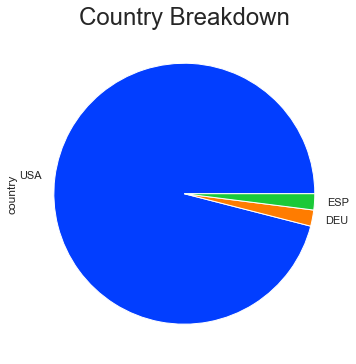

In [18]:
df_country = df_original.copy()
sns.set(rc = {'figure.figsize': (12, 6)})

colors = sns.color_palette('bright')

ax = df_country["country"].value_counts().plot(kind = "pie", colors = colors)

ax.set_title("Country Breakdown", size = 24)
df_country["country"].value_counts()

### <u>48</u> out of 50 players in the Top 50 Scorers are from USA with the other 2 being from Germany (Dirk Nowitzki) and Spain (Pau Gasol)

## 3. Teams with Most Top 50 Players

In [19]:
df_split_teams.groupby("teams").count()["player"].sort_values(ascending = False).head(3)

teams
Los Angeles Lakers    14
Boston Celtics        10
Houston Rockets        9
Name: player, dtype: int64

In [20]:
df_split_teams[df_split_teams["teams"] == "Los Angeles Lakers"].set_index("rank")

,player,position,teams,total_points,years_in_team,teams_played_for
rank,,,,,,
1,Kareem Abdul-Jabbar,C,Los Angeles Lakers,38387,1975–1989,2
2,LeBron James,SF,Los Angeles Lakers,37655,2018–present,3
3,Karl Malone,PF,Los Angeles Lakers,36928,2003–2004,2
4,Kobe Bryant,SG,Los Angeles Lakers,33643,1996–2016,1
7,Wilt Chamberlain,C,Los Angeles Lakers,31419,1968–1973,3
8,Shaquille O'Neal,C,Los Angeles Lakers,28596,1996–2004,6
9,Carmelo Anthony,SF,Los Angeles Lakers,28289,2021–2022,6
23,Jerry West,PG/SG,Los Angeles Lakers,25192,1960–1974,1
29,Russell Westbrook,PG,Los Angeles Lakers,23703,2021–present,4


### Kareem is the top scorer of all-time and spent a large number of years with the Lakers meaning he scored a large proportion of his points with them. However, knowing that Kobe Bryant spent all of his 20-year career with the Lakers, he likely scored the most points for the lakers.

In [21]:
df_split_teams[df_split_teams["teams"] == "Boston Celtics"].set_index("rank")

,player,position,teams,total_points,years_in_team,teams_played_for
rank,,,,,,
8,Shaquille O'Neal,C,Boston Celtics,28596,2010–2011,6
14,Dominique Wilkins,SF,Boston Celtics,26668,1994–1995,5
17,Paul Pierce,SF/SG,Boston Celtics,26397,1999–2013,4
18,John Havlicek,SF/SG,Boston Celtics,26395,1962–1978,1
19,Kevin Garnett,PF/C,Boston Celtics,26071,2007–2013,3
25,Ray Allen,SG,Boston Celtics,24505,2007–2012,4
30,Robert Parish,C,Boston Celtics,23334,1980–1994,4
35,Gary Payton,PG,Boston Celtics,21813,2004–2005,5
36,Larry Bird,SF/PF,Boston Celtics,21791,1979–1992,1


### Shaq is the top scorer overall but only spent 1 year (after which he retired) with the Celtics. Paul Pierce, John Havlicek and Larry Bird likely scored more points for the Celtics.

In [22]:
df_split_teams[df_split_teams["teams"] == "Houston Rockets"].set_index("rank")

,player,position,teams,total_points,years_in_team,teams_played_for
rank,,,,,,
9,Carmelo Anthony,SF,Houston Rockets,28289,2018,6
10,Moses Malone,C,Houston Rockets,27409,1976–1982,7
12,Hakeem Olajuwon,C,Houston Rockets,26946,1984–2001,2
27,James Harden,SG/PG,Houston Rockets,23791,2012–2021,4
28,Charles Barkley,PF,Houston Rockets,23757,1996–2000,3
29,Russell Westbrook,PG,Houston Rockets,23703,2019–2020,4
34,Clyde Drexler,SG,Houston Rockets,22195,1995–1998,2
38,Chris Paul,PG,Houston Rockets,21114,2017–2019,5
48,Joe Johnson,SG/SF,Houston Rockets,20407,2018,7


### Carmelo Anthony is the highest scoring player to have played for the Houston Rockets. However, it is likely that Hakeem Olajuwon, James Harden and Moses Malone scored more points for the Rockets due to the number of years they played for them.

## 4. Most/Least Common Player Positions in Top 50

In [23]:
df_split_positions["position"].value_counts()

SG    17
C     16
SF    15
PF    13
PG     9
Name: position, dtype: int64

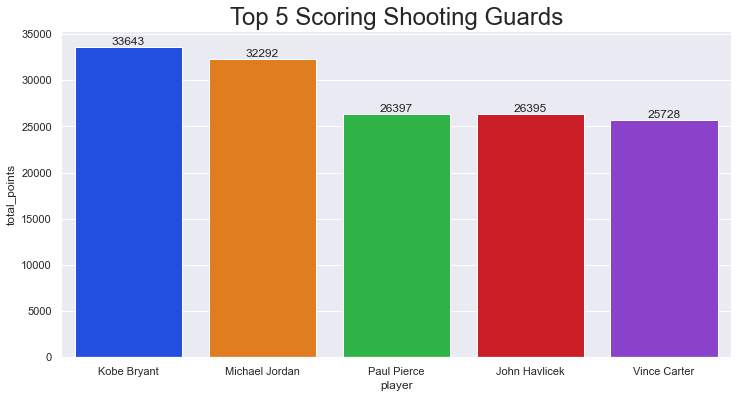

In [24]:
df_split_positions_sg = df_split_positions[df_split_positions["position"].str.contains("SG")].sort_values("rank").head(5)

sns.set(rc = {'figure.figsize': (12, 6)})

ax = sns.barplot(data = df_split_positions_sg,
                 x = "player",
                 y = "total_points",
                 palette = "bright")

ax.set_title("Top 5 Scoring Shooting Guards", size = 24)

for i in ax.containers:
    ax.bar_label(i,)

In [25]:
df_split_positions_sg = df_split_positions[df_split_positions["position"].str.contains("SG")].sort_values("rank").head(3)
df_split_positions_sg["teams"] = df_split_positions_sg["teams"].apply(lambda x: x.split("\n"))
df_split_positions_sg = df_split_positions_sg.explode("teams")
df_split_positions_sg.set_index(["player", "rank", "position", "total_points", "teams"])

Empty DataFrame
Columns: []
Index: [(Kobe Bryant, 4, SG, 33643, Los Angeles Lakers (1996–2016)), (Michael Jordan, 5, SG, 32292, Chicago Bulls (1984–1993, 1995–1998)), (Michael Jordan, 5, SG, 32292, Washington Wizards (2001–2003)), (Paul Pierce, 17, SG, 26397, Boston Celtics (1999–2013)), (Paul Pierce, 17, SG, 26397, Brooklyn Nets (2013–2014)), (Paul Pierce, 17, SG, 26397, Washington Wizards (2014–2015)), (Paul Pierce, 17, SG, 26397, Los Angeles Clippers (2015–2017))]

### The position with the highest number of players in the Top 50 scorers is <u>Shooting Guard</u> where the Top 5 Scoring Shooting Guards are Kobe Bryant, Michael Jordan, Paul Pierce, John Havlicek and Vince Carter.

In [26]:
df_split_positions_pg = df_split_positions[df_split_positions["position"].str.contains("PG")].sort_values("rank").head(3)
df_split_positions_pg["teams"] = df_split_positions_pg["teams"].apply(lambda x: x.split("\n"))
df_split_positions_pg = df_split_positions_pg.explode("teams")
df_split_positions_pg.set_index(["player", "rank", "position", "total_points", "teams"])

Empty DataFrame
Columns: []
Index: [(Oscar Robertson, 13, PG, 26710, Cincinnati Royals (1960–1970)), (Oscar Robertson, 13, PG, 26710, Milwaukee Bucks (1970–1974)), (Jerry West, 23, PG, 25192, Los Angeles Lakers (1960–1974)), (Allen Iverson, 26, PG, 24368, Philadelphia 76ers (1996–2006, 2009–2010)), (Allen Iverson, 26, PG, 24368, Denver Nuggets (2006–2008)), (Allen Iverson, 26, PG, 24368, Detroit Pistons (2008–2009)), (Allen Iverson, 26, PG, 24368, Memphis Grizzlies (2009))]

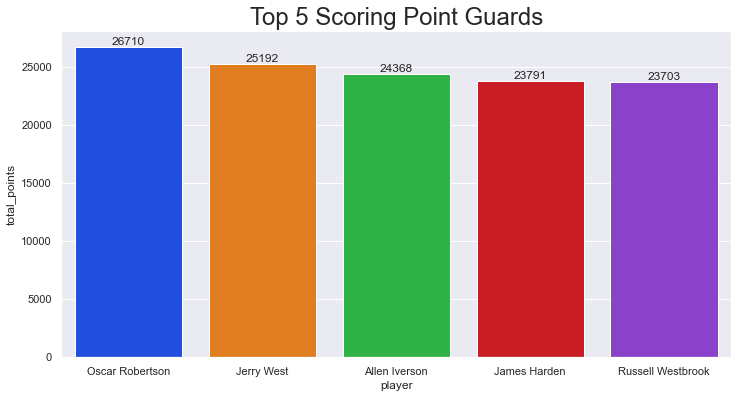

In [27]:
df_split_positions_pg = df_split_positions[df_split_positions["position"].str.contains("PG")].sort_values("rank").head(5)

sns.set(rc = {'figure.figsize': (12, 6)})

ax = sns.barplot(data = df_split_positions_pg,
                 x = "player",
                 y = "total_points",
                 palette = "bright")

ax.set_title("Top 5 Scoring Point Guards", size = 24)

for i in ax.containers:
    ax.bar_label(i,)

### The position with the least number of players in the Top 50 Scorers is <u>Point Guard</u> where the Top 5 Scoring Point Guards are Oscar Robertson, Jerry West, Allen Iverson, James Harden and Russell Westbrook.

## 5. Most/Least Loyal Players

In [28]:
df_loyalty[df_loyalty["teams_played_for"] == 1].set_index("rank")

,player,position,teams,total_points,teams_played_for
rank,,,,,
4,Kobe Bryant,SG,Los Angeles Lakers (1996–2016),33643,1
6,Dirk Nowitzki,PF/C,Dallas Mavericks (1998–2019),31560,1
15,Tim Duncan,PF/C,San Antonio Spurs (1997–2016),26496,1
18,John Havlicek,SF/SG,Boston Celtics (1962–1978),26395,1
22,Reggie Miller,SG,Indiana Pacers (1987–2005),25279,1
23,Jerry West,PG/SG,Los Angeles Lakers (1960–1974),25192,1
33,Elgin Baylor,SF,Minneapolis/Los Angeles Lakers (1958–1971),23149,1
36,Larry Bird,SF/PF,Boston Celtics (1979–1992),21791,1
37,Hal Greer,SG/PG,Syracuse Nationals/Philadelphia 76ers (1958–1973),21586,1


### There are a total of <u>12</u> 1-team players in the Top 50 Scorers.

In [29]:
df_loyalty["teams"] = df_loyalty["teams"].apply(lambda x: x.split("\n"))
df_loyalty = df_loyalty.explode("teams")
df_loyalty[df_loyalty["teams_played_for"] >= 6].sort_values(["teams_played_for", "player"], ascending = False).set_index(["player", "total_points", "rank", "position", "teams_played_for", "teams"])

Empty DataFrame
Columns: []
Index: [(Vince Carter, 25728, 20, SG/SF, 8, Toronto Raptors (1999–2004)), (Vince Carter, 25728, 20, SG/SF, 8, New Jersey Nets (2004–2009)), (Vince Carter, 25728, 20, SG/SF, 8, Orlando Magic (2009–2010)), (Vince Carter, 25728, 20, SG/SF, 8, Phoenix Suns (2010–2011)), (Vince Carter, 25728, 20, SG/SF, 8, Dallas Mavericks (2011–2014)), (Vince Carter, 25728, 20, SG/SF, 8, Memphis Grizzlies (2014–2017)), (Vince Carter, 25728, 20, SG/SF, 8, Sacramento Kings (2017–2018)), (Vince Carter, 25728, 20, SG/SF, 8, Atlanta Hawks (2018–2020)), (Moses Malone, 27409, 10, C, 7, Buffalo Braves (1976)), (Moses Malone, 27409, 10, C, 7, Houston Rockets (1976–1982)), (Moses Malone, 27409, 10, C, 7, Philadelphia 76ers (1982–1986, 1993–1994)), (Moses Malone, 27409, 10, C, 7, Washington Bullets (1986–1988)), (Moses Malone, 27409, 10, C, 7, Atlanta Hawks (1988–1991)), (Moses Malone, 27409, 10, C, 7, Milwaukee Bucks (1991–1993)), (Moses Malone, 27409, 10, C, 7, San Antonio Spurs (1994–1995)), (Joe Johnson, 20407, 48, SG/SF, 7, Boston Celtics (2001–2002, 2021)), (Joe Johnson, 20407, 48, SG/SF, 7, Phoenix Suns (2002–2005)), (Joe Johnson, 20407, 48, SG/SF, 7, Atlanta Hawks (2005–2012)), (Joe Johnson, 20407, 48, SG/SF, 7, Brooklyn Nets (2012–2016)), (Joe Johnson, 20407, 48, SG/SF, 7, Miami Heat (2016)), (Joe Johnson, 20407, 48, SG/SF, 7, Utah Jazz (2016–2018)), (Joe Johnson, 20407, 48, SG/SF, 7, Houston Rockets (2018)), (Adrian Dantley, 23177, 31, SF, 7, Buffalo Braves (1976–1977)), (Adrian Dantley, 23177, 31, SF, 7, Indiana Pacers (1977)), (Adrian Dantley, 23177, 31, SF, 7, Los Angeles Lakers (1977–1979)), (Adrian Dantley, 23177, 31, SF, 7, Utah Jazz (1979–1986)), (Adrian Dantley, 23177, 31, SF, 7, Detroit Pistons (1986–1989)), (Adrian Dantley, 23177, 31, SF, 7, Dallas Mavericks (1989–1990)), (Adrian Dantley, 23177, 31, SF, 7, Milwaukee Bucks (1991)), (Tom Chambers, 20049, 49, PF, 6, San Diego Clippers (1981–1983)), (Tom Chambers, 20049, 49, PF, 6, Seattle SuperSonics (1983–1988)), (Tom Chambers, 20049, 49, PF, 6, Phoenix Suns (1988–1993)), (Tom Chambers, 20049, 49, PF, 6, Utah Jazz (1993–1995)), (Tom Chambers, 20049, 49, PF, 6, Charlotte Hornets (1997)), (Tom Chambers, 20049, 49, PF, 6, Philadelphia 76ers (1997)), (Shaquille O'Neal, 28596, 8, C, 6, Orlando Magic (1992–1996)), (Shaquille O'Neal, 28596, 8, C, 6, Los Angeles Lakers (1996–2004)), (Shaquille O'Neal, 28596, 8, C, 6, Miami Heat (2004–2008)), (Shaquille O'Neal, 28596, 8, C, 6, Phoenix Suns (2008–2009)), (Shaquille O'Neal, 28596, 8, C, 6, Cleveland Cavaliers (2009–2010)), (Shaquille O'Neal, 28596, 8, C, 6, Boston Celtics (2010–2011)), (Carmelo Anthony, 28289, 9, SF, 6, Denver Nuggets (2003–2011)), (Carmelo Anthony, 28289, 9, SF, 6, New York Knicks (2011–2017)), (Carmelo Anthony, 28289, 9, SF, 6, Oklahoma City Thunder (2017–2018)), (Carmelo Anthony, 28289, 9, SF, 6, Houston Rockets (2018)), (Carmelo Anthony, 28289, 9, SF, 6, Portland Trail Blazers (2019–2021)), (Carmelo Anthony, 28289, 9, SF, 6, Los Angeles Lakers (2021–2022)), (Antawn Jamison, 20042, 50, PF/SF, 6, Golden State Warriors (1999–2003)), (Antawn Jamison, 20042, 50, PF/SF, 6, Dallas Mavericks (2003–2004)), (Antawn Jamison, 20042, 50, PF/SF, 6, Washington Wizards (2004–2010)), (Antawn Jamison, 20042, 50, PF/SF, 6, Cleveland Cavaliers (2010–2012)), (Antawn Jamison, 20042, 50, PF/SF, 6, Los Angeles Lakers (2012–2013)), (Antawn Jamison, 20042, 50, PF/SF, 6, Los Angeles Clippers (2013–2014))]

### There are <u>8</u> players in the Top 50 Scorers who have played for 6 or more teams with Vince Carter having played for the most number of teams, <u>8</u>.